# Lab 0 Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import random as rand

## 4.1: Bias Frames

Mean:  1003.8926982879639 
Median:  1004.0 
Mode:  1003.0 
Standard Deviation: 12.503950831904326


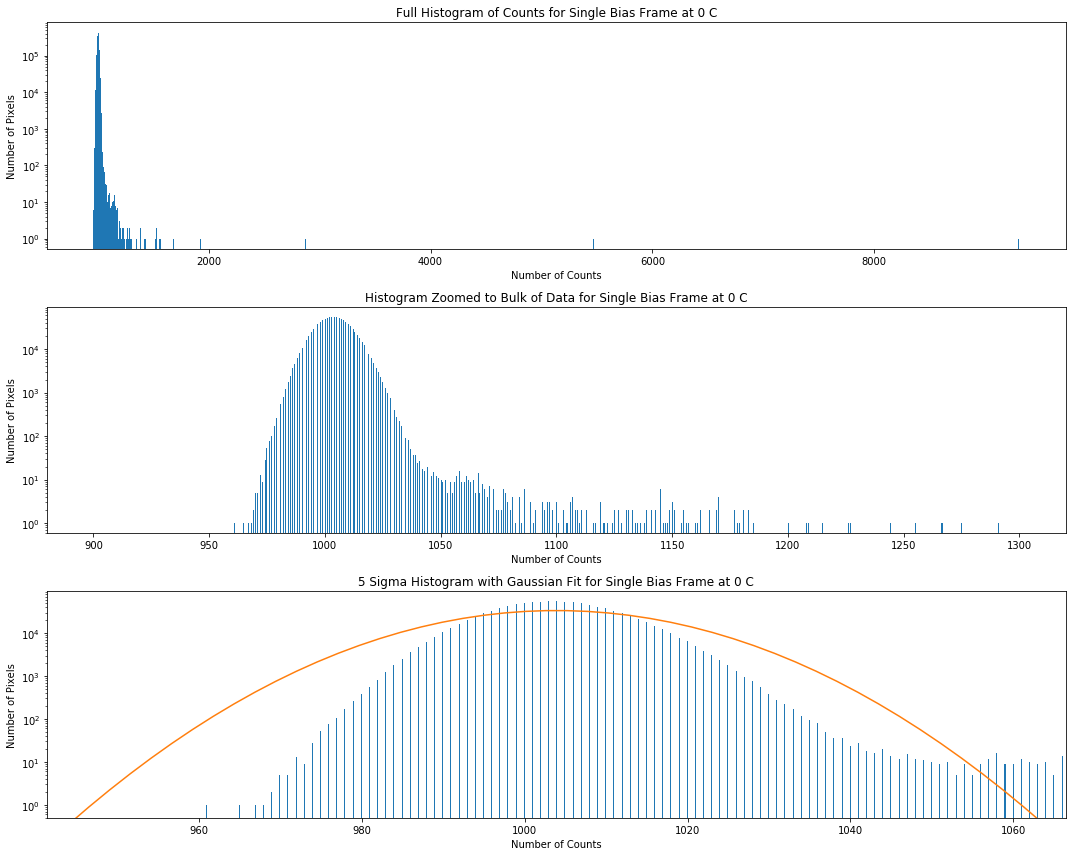

Percent Cut: 0.023%
Mean Electron Read Noise:  2068.0189584732057


In [37]:
# Importing data of 10 series of bias frames
data1, hdr1 = fits.getdata('../data/bias_series_0c.00000001.BIAS.FIT',0,header=True)
data2, hdr2 = fits.getdata('../data/bias_series_0c.00000002.BIAS.FIT',0,header=True)
data3, hdr3 = fits.getdata('../data/bias_series_0c.00000003.BIAS.FIT',0,header=True)
data4, hdr4 = fits.getdata('../data/bias_series_0c.00000004.BIAS.FIT',0,header=True)
data5, hdr5 = fits.getdata('../data/bias_series_0c.00000005.BIAS.FIT',0,header=True)
data6, hdr6 = fits.getdata('../data/bias_series_0c.00000006.BIAS.FIT',0,header=True)
data7, hdr7 = fits.getdata('../data/bias_series_0c.00000007.BIAS.FIT',0,header=True)
data8, hdr8 = fits.getdata('../data/bias_series_0c.00000008.BIAS.FIT',0,header=True)
data9, hdr9 = fits.getdata('../data/bias_series_0c.00000009.BIAS.FIT',0,header=True)
data10, hdr10 = fits.getdata('../data/bias_series_0c.00000010.BIAS.FIT',0,header=True)

# Determining the stats of the stats of one bias frame
mu = np.mean(data1)
sig = np.std(data1)
sig_1 = sig                                      # Save this for use later
mode = float(stats.mode(data1.flatten()).mode)
median = np.median(data1.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(data1.flatten(), bins=1000, log=True)
ax2.hist(data1.flatten(), bins=1000, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(data1.flatten())

ax3.hist([x for x in data1.flatten() if x < mu+5*sig], bins=1000, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title('Full Histogram of Counts for Single Bias Frame at 0 C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title('Histogram Zoomed to Bulk of Data for Single Bias Frame at 0 C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title('5 Sigma Histogram with Gaussian Fit for Single Bias Frame at 0 C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()
plt.show()

# How many pixels were cut out?
print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in data1.flatten() if x < mu+5*sig])/len(data1.flatten())*100))

gain = hdr1['EGAIN']
mean_electron = mu*gain
print('Mean Electron Read Noise: ', mean_electron)

Mean:  1000.411618614197 
Median:  999.7 
Mode:  999.0 
Standard Deviation of 10: 7.080617560970963
Single Frame StdDev / Sqrt(N_frames):  3.954096437957487


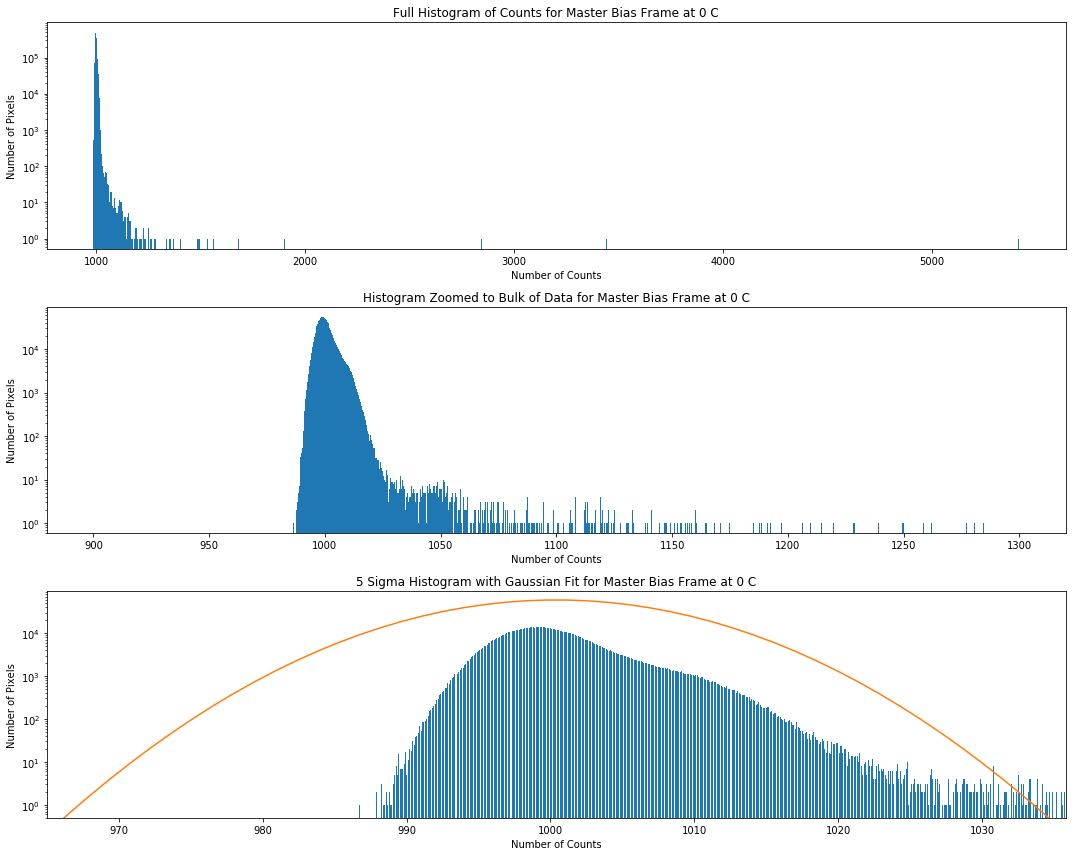

Percent Cut: 0.049%


In [38]:
# Taking the average of the 10 frames to make master_bias frame
master_bias = (data1 + data2 + data3 + data4 + data5 + data6 + data7 + data8 + data9 + data10)/10

# Determining the stats of the stats of the master_bias frame
mu = np.mean(master_bias)
sig = np.std(master_bias)
mode = float(stats.mode(master_bias.flatten()).mode)
median = np.median(master_bias.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation of 10:', sig)
print('Single Frame StdDev / Sqrt(N_frames): ', sig_1/np.sqrt(10))

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(master_bias.flatten(), bins=1000, log=True)
ax2.hist(master_bias.flatten(), bins=1000, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(master_bias.flatten())

ax3.hist([x for x in master_bias.flatten() if x < mu+5*sig], bins=1000, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title('Full Histogram of Counts for Master Bias Frame at 0 C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title('Histogram Zoomed to Bulk of Data for Master Bias Frame at 0 C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title('5 Sigma Histogram with Gaussian Fit for Master Bias Frame at 0 C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()

plt.show()

print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in master_bias.flatten() if x < mu+5*sig])
                                      /len(master_bias.flatten())*100))

Mean:  1027.9918117523193 
Median:  1028.0 
Mode:  1026.0 
Standard Deviation: 20.266803591200183


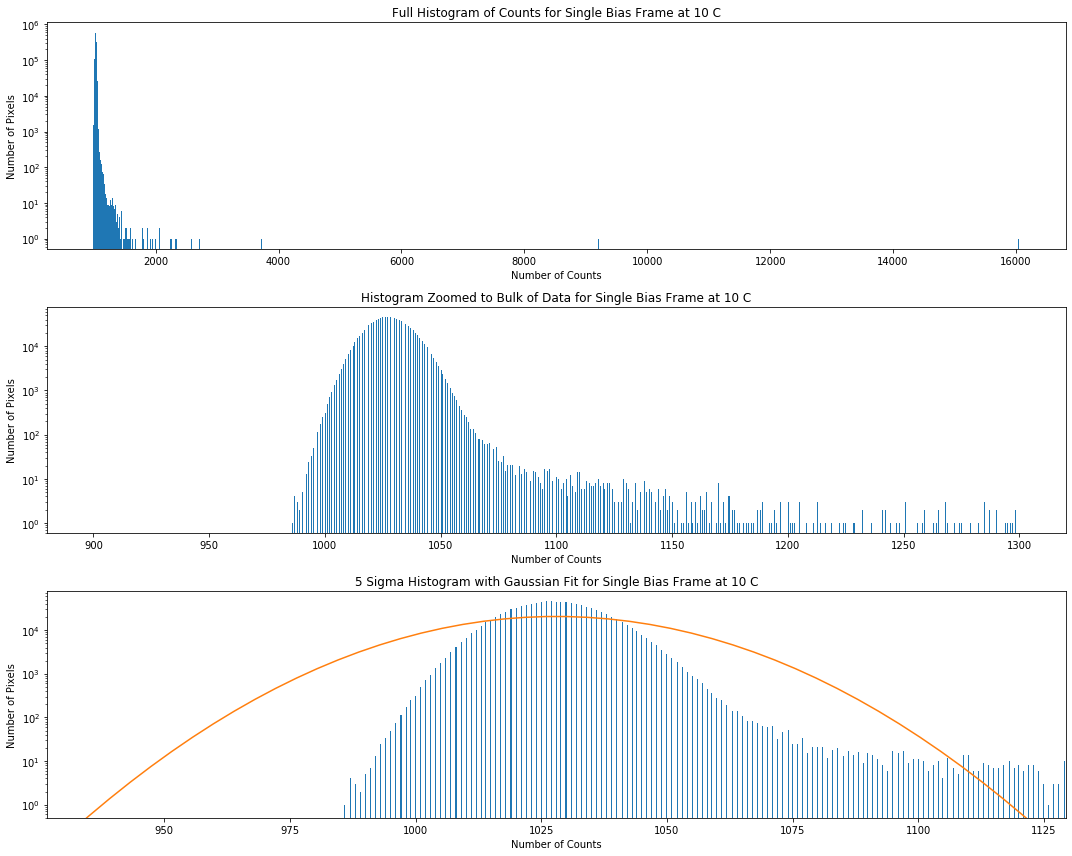

Percent Cut: 0.033%
Mean Electron Read Noise:  2117.663132209778


In [43]:
# Open file
bias_10c, header_10c = fits.getdata('../data/bias_1series_10c_0s.00000001.BIAS.FIT', 0, header=True)

# Determining the stats of the stats of one bias frame
mu = np.mean(bias_10c)
sig = np.std(bias_10c)
mode = float(stats.mode(bias_10c.flatten()).mode)
median = np.median(bias_10c.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(bias_10c.flatten(), bins=1000, log=True)
ax2.hist(bias_10c.flatten(), bins=1000, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(data1.flatten())

ax3.hist([x for x in bias_10c.flatten() if x < mu+5*sig], bins=1000, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title('Full Histogram of Counts for Single Bias Frame at 10 C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title('Histogram Zoomed to Bulk of Data for Single Bias Frame at 10 C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title('5 Sigma Histogram with Gaussian Fit for Single Bias Frame at 10 C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()
plt.show()

# How many pixels were cut out?
print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in bias_10c.flatten() if x < mu+5*sig])/
                                      len(bias_10c.flatten())*100))

gain = header_10c['EGAIN']
mean_electron = mu*gain
print('Mean Electron Read Noise: ', mean_electron)

## 4.2: Dark Frames

The master dark frame is a median average of a series of dark frames at a given tempurature and exposure time. In this case the tempurature and time is $0^\circ$ Celsius and $30$ seconds, respectively. The master dark is made by taking the median value of all the frames for each individual pixel in our 1024 by 1024 image. We take the mean average to mitigate the effects of short lived, bright signals, such as cosmic rays, on our dark frames. This is because the mean is heavily influenced by outliers, especially so at low sample numbers such as our 10 dark frames.

After creating the master dark, we plot a histogram of all the values and find the mean, median, mode, and standard deviation of it.  Due to the size of the array it is plotted on a log scale to easily display the low number of pixels that had very high counts. In order to get a better look at the data, another histogram is created focusing on the values closer to the majority of the data. This range was determined by inspection. Despite the total histogram not resembling a gaussian, the calculated mean and standard deviation of the total master dark is used to create a gaussian distribution that is plotted over the normed histogram. In addition, the $\pm3\sigma$ cutoff is plotted as well. A new data set was created by cutting out all the values that were outside of this $3\sigma$ range, as it is likely that these were not due to random fluctuations in the data.

Using this statistically significant data set, the mean, median, mode, and standard deviation were recalculated. It is noted that with this subset the mean, median, and mode hardly change (if at all) while the standard deviation decreases significantly due to the drop of clear outliers. It is found that of the 1024x1024 array, 1212 pixels fall outside of the $3\sigma$ range, which corresponds to $0.116\%$ of the pixels in the CCD camera being "hot".

In [45]:
# Open all the files and stick them in a list to loop over
dark1 = fits.open('../data/dark_10series_0c_0m30s.00000001.DARK.FIT')
dark2 = fits.open('../data/dark_10series_0c_0m30s.00000002.DARK.FIT')
dark3 = fits.open('../data/dark_10series_0c_0m30s.00000003.DARK.FIT')
dark4 = fits.open('../data/dark_10series_0c_0m30s.00000004.DARK.FIT')
dark5 = fits.open('../data/dark_10series_0c_0m30s.00000005.DARK.FIT')
dark6 = fits.open('../data/dark_10series_0c_0m30s.00000006.DARK.FIT')
dark7 = fits.open('../data/dark_10series_0c_0m30s.00000007.DARK.FIT')
dark8 = fits.open('../data/dark_10series_0c_0m30s.00000008.DARK.FIT')
dark9 = fits.open('../data/dark_10series_0c_0m30s.00000009.DARK.FIT')
dark10 = fits.open('../data/dark_10series_0c_0m30s.00000010.DARK.FIT')
dark_list = [dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data, dark5[0].data, 
             dark6[0].data, dark7[0].data, dark8[0].data, dark9[0].data, dark10[0].data]

# Make master median dark frame
master_dark = np.zeros(shape=dark1[0].shape)     # Blank array with same shape as others
for i in range(1024):                            # Index over one axis
    for j in range(1024):                        # Index over the other
        indices_list = []                        # Make a list of the values in the i,j pixel
        for dark in dark_list:
            indices_list.append(dark[i][j])
        master_dark[i][j] = np.median(indices_list) # Add the median value for the i,j pixel 
                                                    #   to master dark at the right location

# Close all the files
dark1.close()
dark2.close()
dark3.close()
dark4.close()
dark5.close()
dark6.close()
dark7.close()
dark8.close()
dark9.close()
dark10.close()

Range of count values:  1002.0  to  62865.0
Mean:  1025.4666481018066 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 155.56164951672068


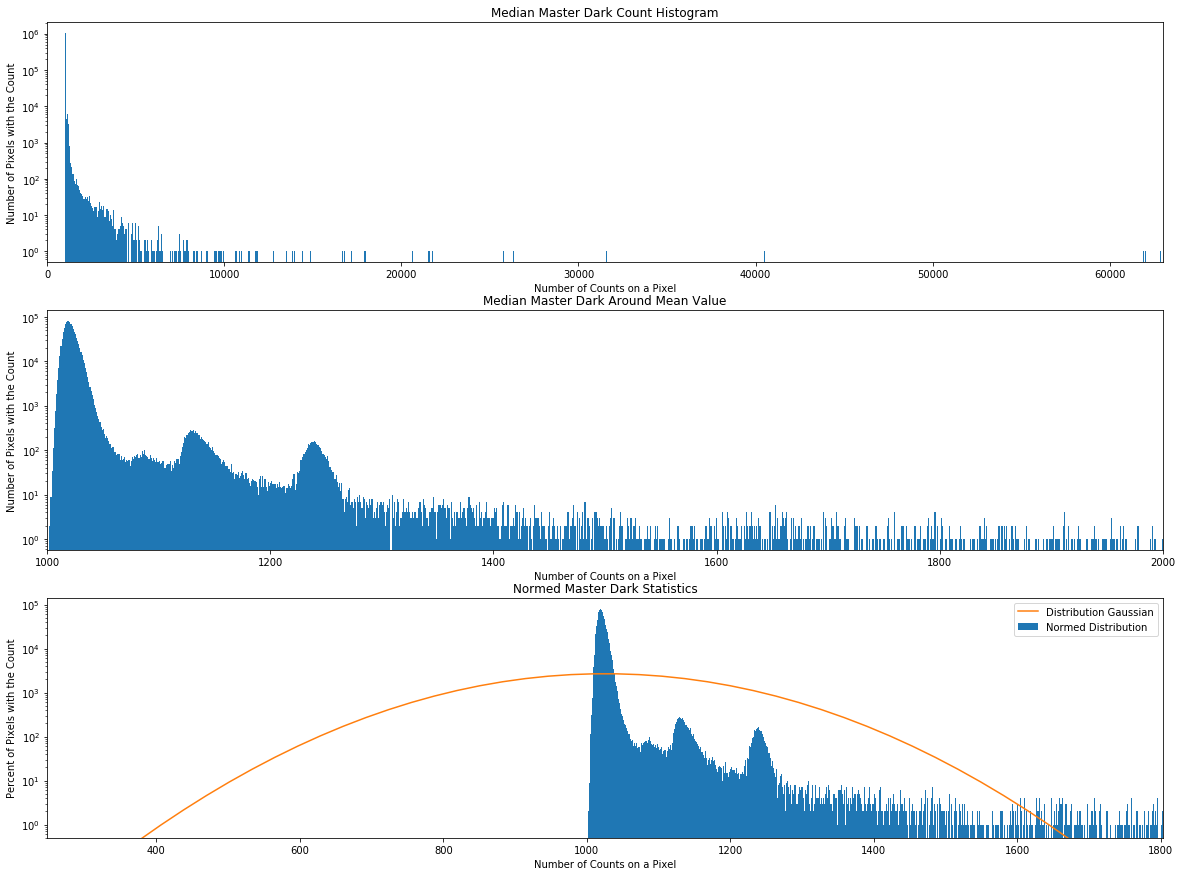

In [52]:
print('Range of count values: ', master_dark.min(), ' to ', master_dark.max())

# Find statistics of master dark
mu = np.mean(master_dark.flatten())
median = np.median(master_dark.flatten())
mode = float(stats.mode(master_dark.flatten()).mode)
sig = np.std(master_dark.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)

# Plot Histograms
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.hist(master_dark.flatten(), bins=1000, log=True)
ax2.hist(master_dark.flatten(), bins=1001, log=True, range=(1000, 2000))
ax3.hist(master_dark.flatten(), bins=1001,
         log=True, range=(1000, 2000), label='Normed Distribution')

ax1.set_xlim(0, 63000)
ax2.set_xlim(1000, 2000)

ax1.set_title('Median Master Dark Count Histogram')
ax2.set_title('Median Master Dark Around Mean Value')
ax3.set_title('Normed Master Dark Statistics')

ax1.set_xlabel('Number of Counts on a Pixel')
ax2.set_xlabel('Number of Counts on a Pixel')
ax3.set_xlabel('Number of Counts on a Pixel')

ax1.set_ylabel('Number of Pixels with the Count')
ax2.set_ylabel('Number of Pixels with the Count')
ax3.set_ylabel('Percent of Pixels with the Count')

# Define a gaussian with the same statistics and overlay it on normed distribution
domain = np.linspace(mu-5*sig, mu+5*sig)
gaussian = np.exp(-1*pow((domain - mu)/sig, 2)/2)/pow(2*sig*sig*np.pi, 0.5)*len(master_dark.flatten())
ax3.plot(domain, gaussian, label='Distribution Gaussian')
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])
ax3.legend()

# Take the +/- 3 sigma value to use later
leftcutoff = mu-5*sig
rightcutoff = mu+5*sig

# Display plot
plt.show()

In [54]:
# How many pixels are out of the count uncertainty to 3 sigma and what fraction is that?
print('5 sigma range: ', leftcutoff, ' to ', rightcutoff)
master_dark_cut = [x for x in master_dark.flatten() if x<rightcutoff and x>leftcutoff] # Only take value in 
                                                                                               #  uncertainty range
print('Number of pixels out of 5 sigma range: ', len(master_dark.flatten())-len(master_dark_cut))
print('Percent of pixels in 5 sigma range: ', len(master_dark_cut)/len(master_dark.flatten()))

# Find statistics for 5 sigma cut
mu_cut = np.mean(master_dark_cut)
median_cut = np.median(master_dark_cut)
mode_cut = float(stats.mode(master_dark_cut).mode)
sig_cut = np.std(master_dark_cut)
print('\nOld Statistics\nMean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)
print('\nNew Statistics\nMean: ', mu_cut, '\nMedian: ', median_cut,
      '\nMode: ', mode_cut, '\nStandard Deviation:', sig_cut)

5 sigma range:  247.65840051820328  to  1803.27489568541
Number of pixels out of 5 sigma range:  816
Percent of pixels in 5 sigma range:  0.9992218017578125

Old Statistics
Mean:  1025.4666481018066 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 155.56164951672068

New Statistics
Mean:  1023.3269207642971 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 23.607032268007156


#### Numbers inaccurate now
Using the found $3\sigma$ range above, a single dark frame that was used to make the master dark is analyzed. The whereas for the master dark, 1212 pixels fell out of the 99.8% undertainty range, for input frame 7, 1229 pixels fell out of the range. This corrosponds to $0.118\%$ of the pixels being hot or dead, instead of the $0.116\%$. The mean for this frame differs from the master by $$\textrm{% Difference}=\frac{\bar{x}_\textrm{frame}-\bar{x}_\textrm{master}}{\bar{x}_\textrm{master}}=-0.025\%.$$
The mean for this dark frame is $0.025\%$ lower than the mean for the master dark. Likewise we can find the percent difference in the standard deviation for frame 7 compared to the master dark to be $6.539\%$ higher.

These do not change by very much since we took the master dark to be the pixel-wise median average of the 10 input frames. Since each frame was taken under the same conditions, they would ideally all be identical if dark current was regular as opposed to probabilistic. Since it is probabilistic, no input frame is expected to hold the mean value for significantly more pixels than any other frame. This leads to the master dark distribution closely modelling the distribution of an input frame, with more accurately determined parameters.  

In [55]:
# Take a dark frame, apply the same 5 sigma cutoff from master dark, what are stats?
input_dark = dark_list[6]
input_dark_cut = [x for x in input_dark.flatten() if x<rightcutoff and x>leftcutoff]
print('Number of pixels out of 5 sigma range: ', len(input_dark.flatten())-len(input_dark_cut))
print('Percent of pixels in 5 sigma range: ', len(input_dark_cut)/len(input_dark.flatten()))

mu_frame = np.mean(input_dark_cut)
median_frame = np.median(input_dark_cut)
mode_frame = float(stats.mode(input_dark_cut).mode)       # Specify to get just the value as a float
sig_frame = np.std(input_dark_cut)
print('\nCut Input Frame Statistics\nMean: ', mu_frame, '\nMedian: ', median_frame, 
      '\nMode: ', mode_frame, '\nStandard Deviation:', sig_frame)
print('\nNew Statistics\nMean: ', mu_cut, '\nMedian: ', median_cut,
      '\nMode: ', mode_cut, '\nStandard Deviation:', sig_cut)

print('\nMean Diff: {0:4.3f}%'.format((mu_frame-mu_cut)/mu_cut*100))
print('StdDev Diff: {0:4.3f}%'.format((sig_frame-sig_cut)/sig_cut*100))

Number of pixels out of 5 sigma range:  825
Percent of pixels in 5 sigma range:  0.9992132186889648

Cut Input Frame Statistics
Mean:  1023.0736005024095 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 24.825415141191353

New Statistics
Mean:  1023.3269207642971 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 23.607032268007156

Mean Diff: -0.025%
StdDev Diff: 5.161%


In [65]:
# Open all the files
dark0m10s = fits.open('../data/dark_series_0c_10s.00000001.DARK.FIT')
dark1m00s = fits.open('../data/dark_series_0c_1m.00000001.DARK.FIT')
dark1m30s = fits.open('../data/dark_series_0c_1m30s.00000001.DARK.FIT')
dark2m00s = fits.open('../data/dark_series_0c_2m.00000001.DARK.FIT')
dark2m30s = fits.open('../data/dark_series_0c_2m30s.00000001.DARK.FIT')
dark3m00s = fits.open('../data/dark_series_0c_3m.00000001.DARK.FIT')
dark3m30s = fits.open('../data/dark_series_0c_3m30s.00000001.DARK.FIT')
dark4m00s = fits.open('../data/dark_series_0c_4m.00000001.DARK.FIT')
dark4m30s = fits.open('../data/dark_series_0c_4m30s.00000001.DARK.FIT')
dark5m00s = fits.open('../data/dark_series_0c_5m.00000001.DARK.FIT')
dark_series = [dark0m10s, dark1m00s, dark1m30s, dark2m00s, dark2m30s,
               dark3m00s, dark3m30s, dark4m00s, dark4m30s, dark5m00s]

# Find mean, std, exptime of each exposure-bias
# Make an array of only the valid values under the 3 sigma cutoff
dark_currents= []
exp_times = []
means = []
sig_on_mean = []
for file in dark_series:
    dark_current = file[0].data-master_bias
    
    mean = np.mean(dark_current)
    stddev = np.std(dark_current/len(dark_current.flatten()))

    dark_currents.append([x for x in dark_current.flatten() if x < mean+3*stddev])
    exp_times.append(file[0].header['EXPTIME'])
    means.append(mean)
    sig_on_mean.append(stddev)

for i in range(len(dark_currents)):
    print('{0:3.0f}s Frame    Min: {1:4.2f}     Max: {2:5.2f}    Median: {3:3.3f}    StdDev: {4:4f}'.format(
            exp_times[i], dark_current[i].min(), dark_current[i].max(), means[i], sig_on_mean[i]))

# Close all the files
dark0m10s.close()
dark1m00s.close()
dark1m30s.close()
dark2m00s.close()
dark2m30s.close()
dark3m00s.close()
dark3m30s.close()
dark4m00s.close()
dark4m30s.close()
dark5m00s.close()

 10s Frame    Min: 147.40     Max: 20492.70    Median: 7.691    StdDev: 0.000088
 60s Frame    Min: 144.60     Max: 19857.60    Median: 52.260    StdDev: 0.000234
 90s Frame    Min: 137.10     Max: 4513.70    Median: 78.029    StdDev: 0.000315
120s Frame    Min: 150.50     Max: 15093.80    Median: 103.740    StdDev: 0.000389
150s Frame    Min: 142.00     Max: 5387.10    Median: 129.500    StdDev: 0.000449
180s Frame    Min: 143.60     Max: 2776.90    Median: 155.055    StdDev: 0.000501
210s Frame    Min: 146.00     Max: 4551.20    Median: 180.666    StdDev: 0.000561
240s Frame    Min: 138.40     Max: 2751.30    Median: 205.205    StdDev: 0.000614
270s Frame    Min: 127.40     Max: 6430.00    Median: 231.104    StdDev: 0.000663
300s Frame    Min: 148.20     Max: 12060.80    Median: 256.071    StdDev: 0.000711


Dark Current = 0.8639 +/- 0.0033 e/pix/s
Intercept = -0.7234 +/- 0.2608. Should be 0 if perfect Camera.


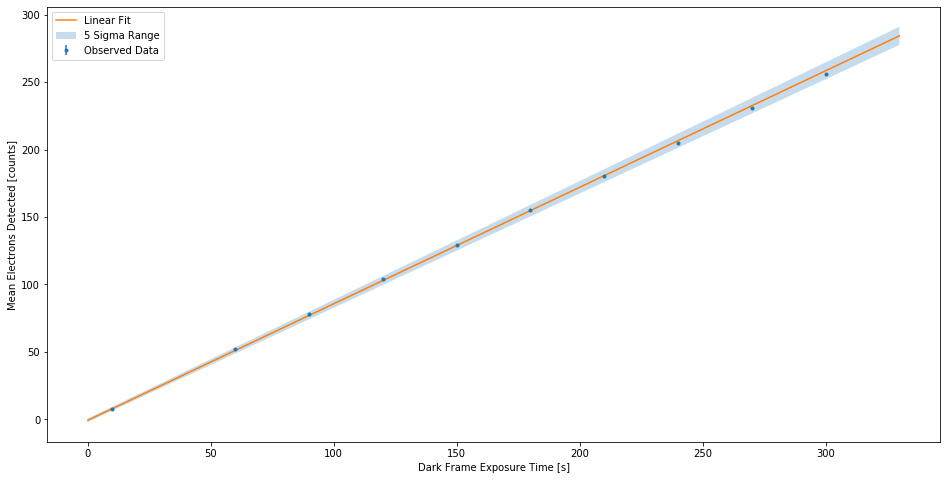

In [57]:
# Linear regression with y-axis errors
def line(x, a, b):
    return a*x+b

# Get optimal ab params and covar matrix, make it a function
popt, pcov = curve_fit(line, exp_times, means, sigma=sig_on_mean)
fit_err = np.sqrt(np.diag(pcov))
dark_current_function = np.poly1d(popt)
dark_current_lo = np.poly1d(popt - 5*fit_err)
dark_current_hi = np.poly1d(popt + 5*fit_err)

# Make the scatter plot with error bars
time = np.linspace(0, 330, 330)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)
ax1.errorbar(exp_times, means, yerr=sig_on_mean, linestyle='none', marker='.', label='Observed Data')
ax1.set_xlabel('Dark Frame Exposure Time [s]')
ax1.set_ylabel('Mean Electrons Detected [counts]')
ax1.plot(time, dark_current_function(time), label='Linear Fit')
ax1.fill_between(time, dark_current_lo(time), dark_current_hi(time), alpha=0.25, label='5 Sigma Range')

print('Dark Current = {0:4.4f} +/- {1:4.4f} e/pix/s'.format(popt[0], fit_err[0]))
print('Intercept = {0:4.4f} +/- {1:4.4f}. Should be 0 if perfect Camera.'.format(popt[1], fit_err[1]))

ax1.legend()
plt.show()

Dark Current = 3.5207 +/-  inf e/pix/s
Intercept = -0.0000 +/-  inf. Should be 0 if perfect Camera.


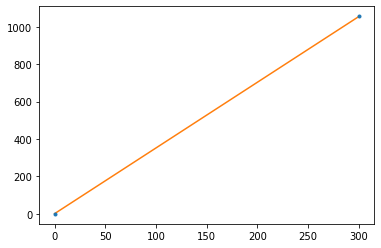

In [68]:
# Open files
bias_10c = fits.open('../data/bias_1series_10c_0s.00000001.BIAS.FIT')
dark_10c = fits.open('../data/dark_1series_10c_5m.00000001.DARK.FIT')

# Subtract bias
dark_corrected_10c = dark_10c[0].data - bias_10c[0].data

# Find mean and stddev
mu = np.mean(dark_corrected_10c.flatten())
sig = np.std(dark_corrected_10c.flatten())

# define domain and gaussian using stats
domain = np.linspace(-500,10000, 1000)
gaussian = np.exp(-1*pow((domain - mu)/sig, 2)/2)/pow(2*sig*sig*np.pi, 0.5)

# Plot to get dark current at 10c
err_on_mean = sig/np.sqrt(len(dark_corrected_10c.flatten()))
fig, ax = plt.subplots(1, 1)
ax.errorbar([0, dark_10c[0].header['EXPTIME']], [0, mu], yerr=err_on_mean, linestyle='none', marker='.')

# Fit again
popt, pcov = curve_fit(line, [0, dark_10c[0].header['EXPTIME']], [0, mu], sigma=[err_on_mean, err_on_mean])
fit_err = np.sqrt(np.diag(pcov))
dark_current_10c_function = np.poly1d(popt)
dark_current_10c_lo = np.poly1d(popt - 3*fit_err)
dark_current_10c_hi = np.poly1d(popt + 3*fit_err)

# Plot fit line
ax.plot([0, dark_10c[0].header['EXPTIME']], dark_current_10c_function([0, dark_10c[0].header['EXPTIME']]))

print('Dark Current = {0:4.4f} +/- {1:4.4f} e/pix/s'.format(popt[0], fit_err[0]))
print('Intercept = {0:4.4f} +/- {1:4.4f}. Should be 0 if perfect Camera.'.format(popt[1], fit_err[1]))

# Close files
bias_10c.close()
dark_10c.close()

## 4.3: Imaging Flat Fields

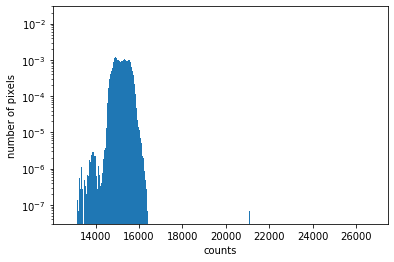

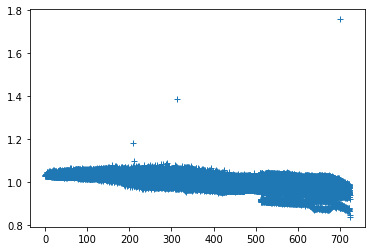

In [77]:
#initialize lists
filename=['../data/flat.00000007.FLAT.FIT',
'../data/flat.00000008.FLAT.FIT',
'../data/flat.00000009.FLAT.FIT',
'../data/flat.00000010.FLAT.FIT',
'../data/flat.00000011.FLAT.FIT',
'../data/flat.00000012.FLAT.FIT',
'../data/flat.00000013.FLAT.FIT',
'../data/flat.00000014.FLAT.FIT',
'../data/flat.00000015.FLAT.FIT',
'../data/flat.00000016.FLAT.FIT']
flatimage=[None]*10
imagedata=[None]*10

#read .fits files
for i in range(10):
    flatimage[i]=fits.open(filename[i])
    imagedata[i]=flatimage[i][0].data
        
#take average of 10 flat-fields
avgcounts=np.mean(imagedata,axis=0)
avg=fits.PrimaryHDU(avgcounts)

#normalize to typical counts level(mean), take relative sensitivity(ratio) of each pixel
avgcounts1=avgcounts.ravel()    # make 2d to 1d
mean=np.mean(avgcounts1)
std=np.std(avgcounts1)
ratio=avgcounts/mean

#plot histo of the counts for master flat-field
plt.figure()
plt.hist(avgcounts1, 1000, density=True)#, range=[12000, 27000])
plt.xlabel('counts')
plt.ylabel('number of pixels')
plt.ylim(3e-8, 3e-2)
plt.yscale('log')
plt.show()

#plot relative sensitivity vs distance from the center
x=np.array(range(1,1025))
y=np.array(range(1,1025))
xc,yc=np.meshgrid(x,y)
d=((xc-512.5)**2+(yc-512.5)**2)**0.5
plt.plot(d.ravel(),ratio.ravel(),'+')
plt.show()

## 4.4: Bad Pixel Map

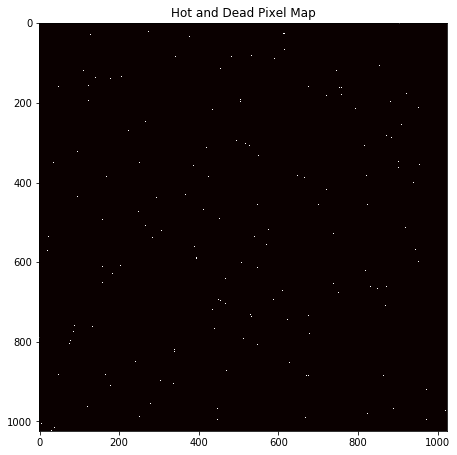

In [82]:
hot_map = np.empty(shape=master_dark.shape)
dead_map = np.empty(shape=master_dark.shape)
total_map = np.empty(shape=master_dark.shape)

# Make hot map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if master_dark[i][j] > rightcutoff:
            hot_map[i][j] = 1
        else:
            hot_map[i][j] = 0            

# Make dead map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if avg.data[i][j] < mean-5*std or avg.data[i][j] > mean + 5*std:
            dead_map[i][j] = 1
        else:
            dead_map[i][j] = 0

# Make total map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if (hot_map[i][j] == 1) or (dead_map[i][j] == 1):
            total_map[i][j] = 1
        else:
            total_map[i][j] = 0
            
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(111)
ax1.set_title('Hot and Dead Pixel Map')
ax1.imshow(total_map, cmap='hot')
plt.show()

## 4.6: Calibration Strategies